## Desarrollar una red neuronal totalmente conectada para clasificar datos de la base de datos "train" con múltiples clases.

Alcanzar los siguientes objetivos de rendimiento:

- Accuracy en entrenamiento > 85%
- Accuracy en validación > 85%

Observaciones
- Utilizar la columna "Label" como variable objetivo
- Utilizar las columnas "pixel" como características de entrada

In [57]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


In [58]:
df = pd.read_csv("./train.csv")

In [59]:
df.head(3)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0


In [60]:
X = df.drop('label', axis=1).values
y = df['label'].values

In [61]:
y

array([2, 9, 6, ..., 8, 8, 7], dtype=int64)

In [62]:
y_unique, y_unique_count = np.unique(y, return_counts=True)
num_classes = len(y_unique_count)

In [63]:
y = to_categorical(y, num_classes=num_classes)

In [64]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [65]:
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)    

In [66]:
n_vars= X_train.shape[1]
n_vars

784

In [77]:
modelo = Sequential([
    Dense(1024, activation='relu', input_shape=(n_vars,)),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    
    Dense(num_classes, activation='softmax')
])

C:\Users\34665\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [81]:
modelo.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [87]:
historia = modelo.fit(
    X_train, y_train,
    epochs=100,
    batch_size=128,
    validation_data=(X_val, y_val),
    verbose=0
)

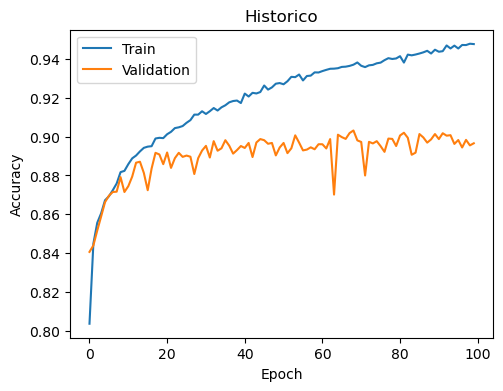

In [91]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(historia.history['accuracy'], label='Train')
plt.plot(historia.history['val_accuracy'], label='Validation')
plt.title('Historico')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

In [95]:
ACC = modelo.evaluate(X_val, y_val)
print("Accuracy: ", ACC[1])

375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8988 - loss: 0.3353
Accuracy:  0.8965833187103271
